# Predicting Thyroid Cancer Recurrence - EDA

## The dataset

This dataset was collated as part of the study completed by Borzooei et al. (2023) to explore the possibility to training machine learning models to predict the likelihood of recurrence of well-differentiated thyroid cancer. 383 patients were a part of the study and were observed for 10 years within a period of 15 years.

Below are the columns included in the dataset and what they represent:

- Age: Patient's age.
- Gender: Patient's gender.
- Smoking: Smoking status (binary).
- Hx Smoking: History of smoking (binary).
- Hx Radiotherapy: History of radiotherapy (binary).
- Thyroid Function: Thyroid function details.
- Physical Examination: Results of physical examination.
- Adenopathy: Presence of adenopathy (binary).
- Pathology: Pathology details.
- Focality: Focality information.
- Risk: Risk assessment.
- T, N, M, Stage: Cancer staging attributes.
- Response: Response details.
- Recurred: Dependent variable indicating recurrence (binary).

## 1. Imports and Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_1341/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = "../data/raw/Thyroid_Diff.csv"
df = pd.read_csv(file_path)

## 2. Initial Exploration

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

There are no missing values and all bar Age are categorical features. Encoding will be required to handle the categorical features. Exploration of feature seection techniques may be required as following encoding there will be a lot of features compared to the number of observations present in the dataset.

In [6]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


The average patient age is approximately 41, with the youngest being 15 and oldest being 82. Median age is 37, which is relatively close to the mean. 

Question: Is age the age of the patient at the start of observation?

In [7]:
df.shape

(383, 17)

In [15]:
df.duplicated().sum()

19

It appears there are duplicates, however as there is many categorical features, I believe they are false duplicates (patients that fall into identical categories).

> How should this scenario be handled? My gut is to keep them as we don't have many observations to start with.

In [16]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [19]:
# What are the categories in each feature
cat_features = df.drop(['Recurred', 'Age'], axis=1)
columns = cat_features.columns

for col in columns:
    print(f"Categories in {col}: {cat_features[col].unique()}")

Categories in Gender: ['F' 'M']
Categories in Smoking: ['No' 'Yes']
Categories in Hx Smoking: ['No' 'Yes']
Categories in Hx Radiothreapy: ['No' 'Yes']
Categories in Thyroid Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Categories in Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Categories in Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Categories in Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Categories in Focality: ['Uni-Focal' 'Multi-Focal']
Categories in Risk: ['Low' 'Intermediate' 'High']
Categories in T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
Categories in N: ['N0' 'N1b' 'N1a']
Categories in M: ['M0' 'M1']
Categories in Stage: ['I' 'II' 'IVB' 'III' 'IVA']
Categories in Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomple

## Exploring Feature Distribution

#### Age distribution

Plot a historgram to see where the best splits for age would be when we discretise that feature.

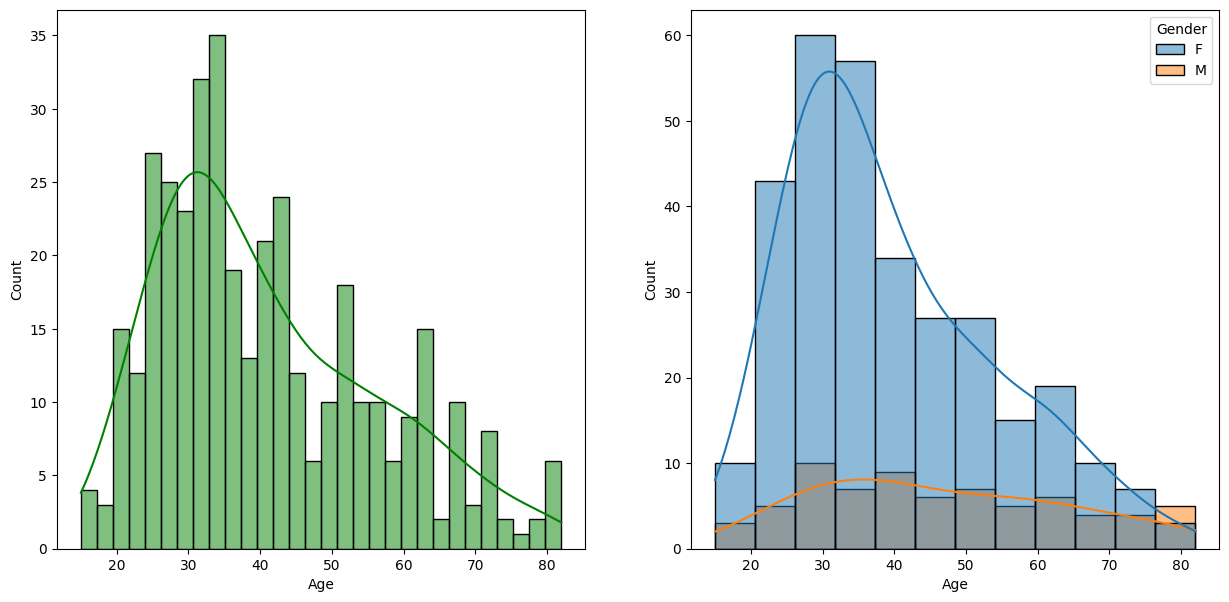

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Gender')
plt.show()

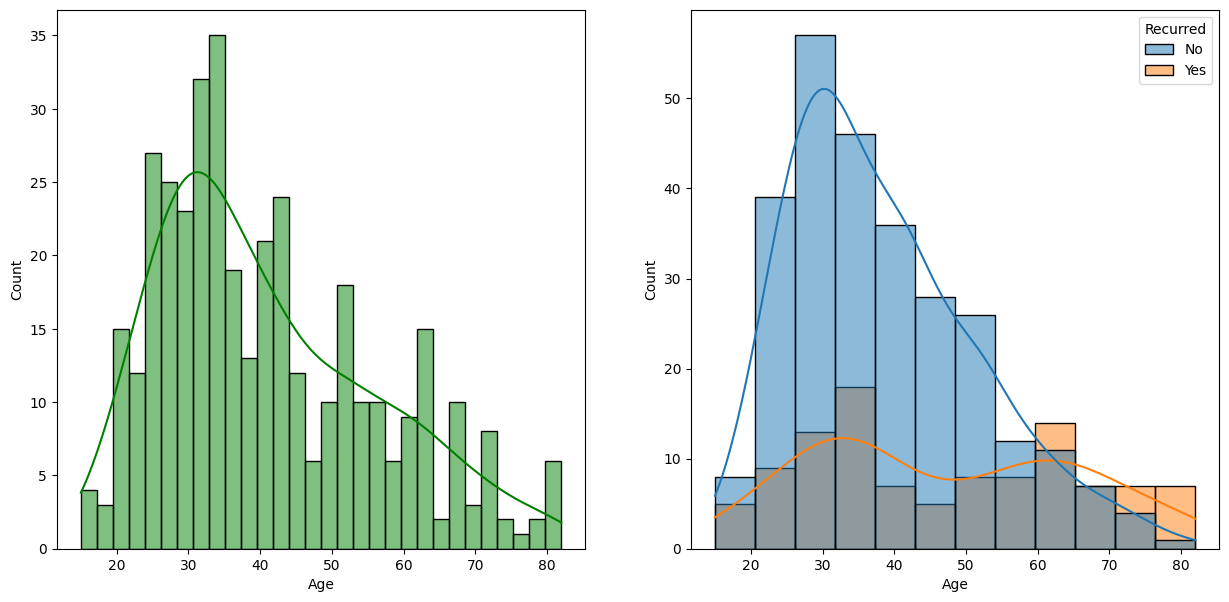

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Recurred')
plt.show()

In [9]:
# gender distribution
gender_distribution = df.groupby('Gender').size()
gender_distribution

Gender
F    312
M     71
dtype: int64

In [10]:
# Created a dictionary of all columns class distribution
columns = df.columns
feature_distributions = {}
for col in columns:
    distribution = df.groupby(col).size()
    feature_distributions[col] = distribution
    

## Exploring Class Distribution

In [11]:
# Target class distribution
target_distribution = df.groupby('Recurred').size()
target_distribution

Recurred
No     275
Yes    108
dtype: int64

We can see that there is more than half of the observations with the class Yes compared with No, so our dataset is imbalanced. This will have to be considered when preparing for modelling.

## Feature Selection

#### References

Borzooei, S., Briganti, G., Golparian, M. et al. Machine learning for risk stratification of thyroid cancer patients: a 15-year cohort study. Eur Arch Otorhinolaryngol (2023). https://doi.org/10.1007/s00405-023-08299-w